In [2]:
import pandas as pd
wthr_df = pd.read_csv(r"C:\Users\ASUS\Downloads\weather_forecast.csv")
wthr_df.head(14)

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in wthr_df.columns:
    wthr_df[column] = le.fit_transform(wthr_df[column])

print(wthr_df.head(14))


    Outlook  Temperature  Humidity  Windy  Play
0         2            1         0      1     0
1         2            1         0      0     0
2         0            1         0      1     1
3         1            2         0      1     1
4         1            0         1      1     1
5         1            0         1      0     0
6         0            0         1      0     1
7         2            2         0      1     0
8         2            0         1      1     1
9         1            2         1      1     1
10        2            2         1      0     1
11        0            2         0      0     1
12        0            1         1      1     1
13        1            2         0      0     0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X = wthr_df.drop('Play', axis=1)
y = wthr_df['Play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB


wthr_df = pd.read_csv(r"C:\Users\ASUS\Downloads\weather_forecast.csv")


outlook_le = LabelEncoder()
temperature_le = LabelEncoder()
humidity_le = LabelEncoder()
windy_le = LabelEncoder()
play_le = LabelEncoder()

wthr_df['Outlook'] = outlook_le.fit_transform(wthr_df['Outlook'])
wthr_df['Temperature'] = temperature_le.fit_transform(wthr_df['Temperature'])
wthr_df['Humidity'] = humidity_le.fit_transform(wthr_df['Humidity'])
wthr_df['Windy'] = windy_le.fit_transform(wthr_df['Windy'])
wthr_df['Play'] = play_le.fit_transform(wthr_df['Play'])

X = wthr_df.drop('Play', axis=1)
y = wthr_df['Play']

model = GaussianNB()
model.fit(X, y)


sample_input = ['Sunny', 'Mild', 'High', 'Weak']

sample_input_encoded = [
    outlook_le.transform([sample_input[0]])[0],
    temperature_le.transform([sample_input[1]])[0],
    humidity_le.transform([sample_input[2]])[0],
    windy_le.transform([sample_input[3]])[0]
]


sample_input_df = pd.DataFrame([sample_input_encoded], columns=X.columns)


prediction = model.predict(sample_input_df)

play_tennis = play_le.inverse_transform(prediction)

print(f"Prediction for {sample_input}: {'Play Tennis' if play_tennis[0] == 1 else 'Do Not Play Tennis'}")


Prediction for ['Sunny', 'Mild', 'High', 'Weak']: Do Not Play Tennis


In [19]:
from sklearn.preprocessing import LabelEncoder


outlook_le = LabelEncoder()
temperature_le = LabelEncoder()
humidity_le = LabelEncoder()
windy_le = LabelEncoder()
play_le = LabelEncoder()


wthr_df['Outlook'] = outlook_le.fit_transform(wthr_df['Outlook'])
wthr_df['Temperature'] = temperature_le.fit_transform(wthr_df['Temperature'])
wthr_df['Humidity'] = humidity_le.fit_transform(wthr_df['Humidity'])
wthr_df['Windy'] = windy_le.fit_transform(wthr_df['Windy'])
wthr_df['Play'] = play_le.fit_transform(wthr_df['Play'])


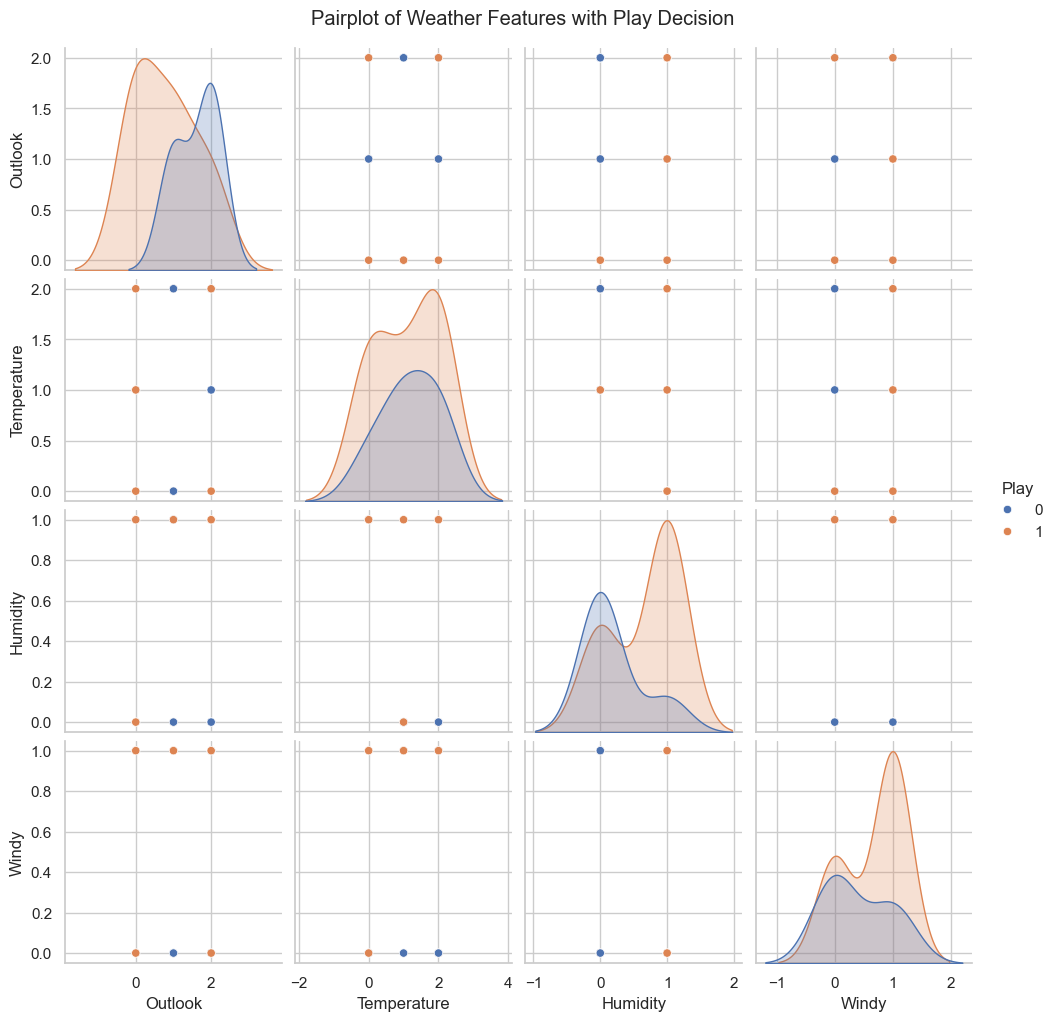

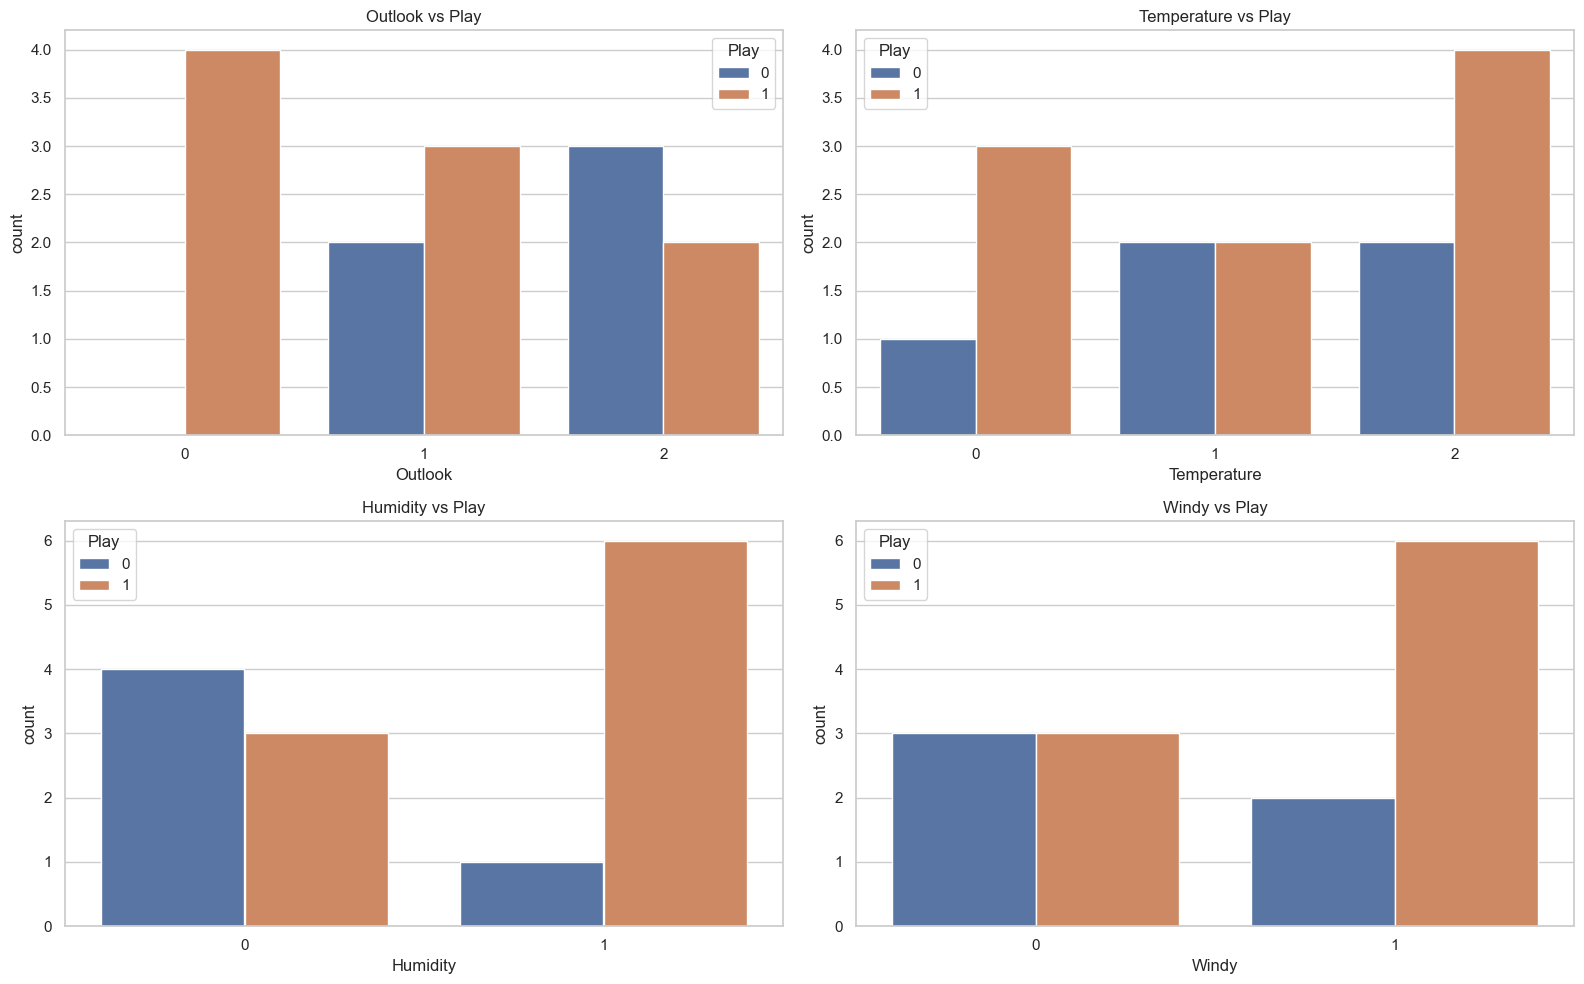

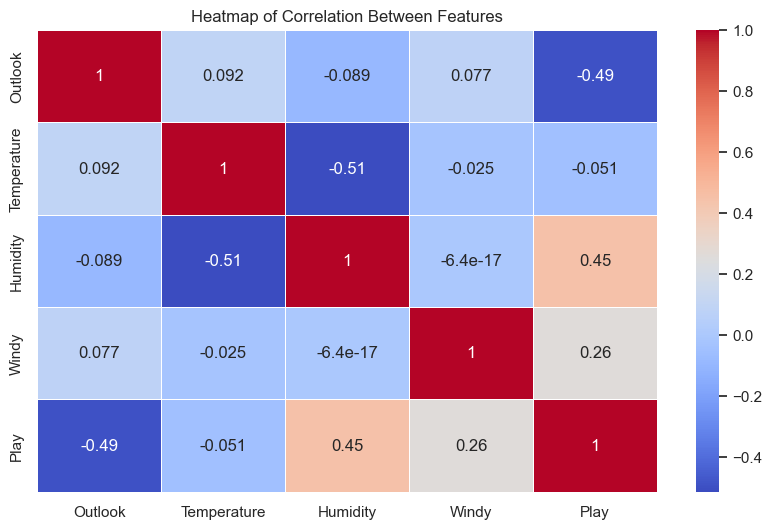

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

sns.pairplot(wthr_df, hue="Play")
plt.suptitle("Pairplot of Weather Features with Play Decision", y=1.02)
plt.show()


plt.figure(figsize=(16, 10))


plt.subplot(2, 2, 1)
sns.countplot(x="Outlook", hue="Play", data=wthr_df)
plt.title("Outlook vs Play")


plt.subplot(2, 2, 2)
sns.countplot(x="Temperature", hue="Play", data=wthr_df)
plt.title("Temperature vs Play")


plt.subplot(2, 2, 3)
sns.countplot(x="Humidity", hue="Play", data=wthr_df)
plt.title("Humidity vs Play")


plt.subplot(2, 2, 4)
sns.countplot(x="Windy", hue="Play", data=wthr_df)
plt.title("Windy vs Play")

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.heatmap(wthr_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Between Features")
plt.show()
